<a href="https://colab.research.google.com/github/John-Akech/My-First-Plotting-Assignment/blob/master/Plotting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Plotting - Matplotlib Seaborn, Histograms and Boxplots**

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, you will be performing analysis more specifically on transport (vehicles and fuel efficiency).

The dataset has been provided for you.

You are tasked to make sense of this data that will later be used for AI purposes.

In [44]:
# prerequisite package imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

:We'll work with the fuel economy dataset in this workspace.

Load the dataset and print at least 10 rows

1.   Load the dataset
2.   print atleast 10 rows of it



In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Loading the dataset
fuel_df = pd.read_csv('/content/drive/MyDrive/00001_ML_Specialization_works/fuel_econ.csv')

In [40]:
# Printing 10 rows of the dataset
fuel_df.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


In [41]:
# displaying a few rows,(4 <rows< 11)
fuel_df.iloc[4:11]

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4
10,32217,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,6,3.8,89,0,18.1909,22.8000,26.7761,37.9000,21.2581,420,5,5


Play Around with Bin size as you create your Histogram

[Bin size in Matplot Lib](https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/)

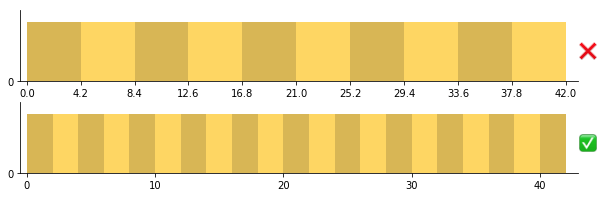

 **Description**
The dataset has a number of different statistics that describe fuel efficiency.


**TO DO**:
1.   create a _histogram_ that depicts the distribution of carbon Dioxide
2.   Play  around with different bin width sizes to see what best depicts the data

Create 2 more histograms based on columns of your choice








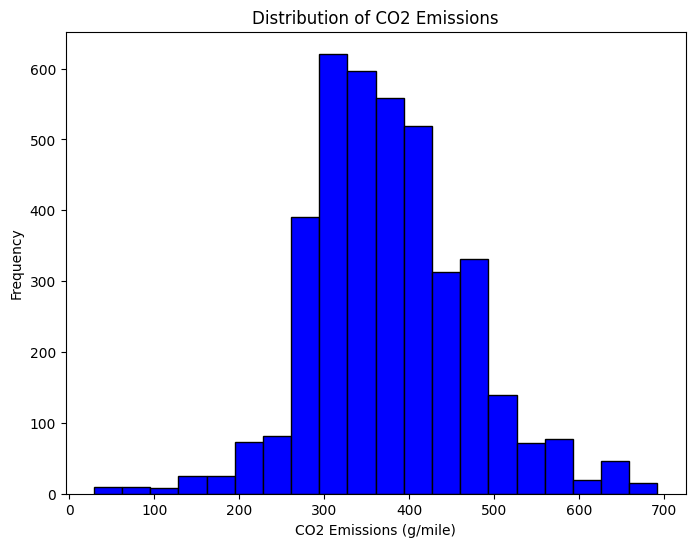

In [42]:
# Plot histogram for CO2 emissions
plt.figure(figsize=(8, 6))
plt.hist(fuel_df['co2'], bins=20, color='blue', edgecolor='black')
plt.xlabel('CO2 Emissions (g/mile)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emissions')
plt.show()


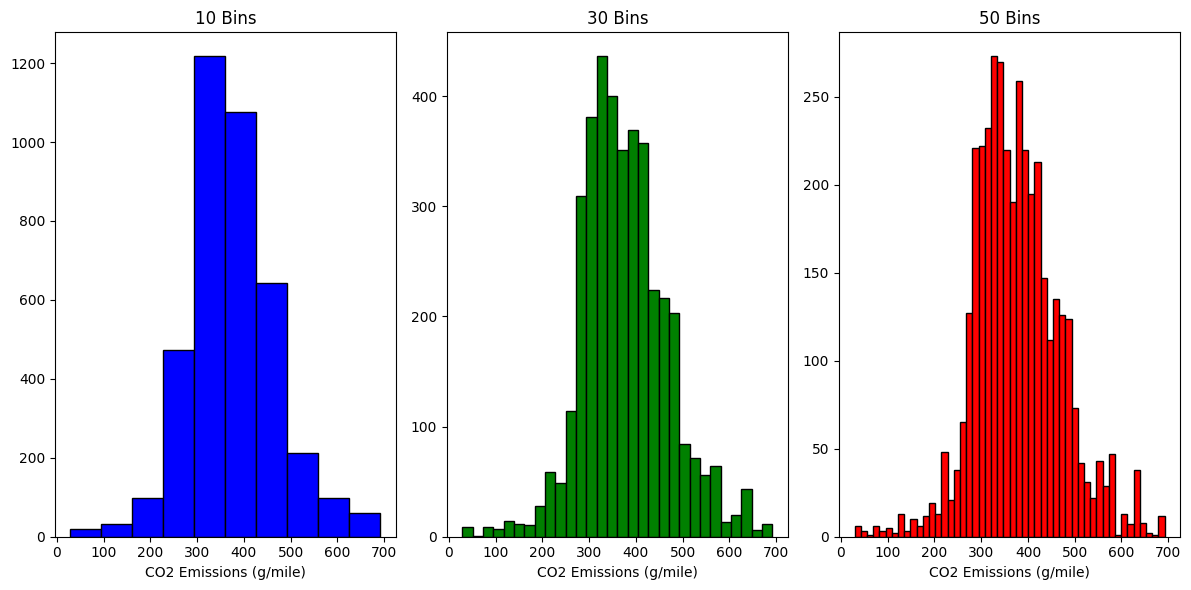

In [47]:
# Experimenting with Different Bin Sizes
# Plot with different bin sizes

plt.figure(figsize=(12, 6))

# 10 bins
plt.subplot(1, 3, 1)
plt.hist(fuel_df['co2'], bins=10, color='blue', edgecolor='black')
plt.xlabel('CO2 Emissions (g/mile)')
plt.title('10 Bins')

# 30 bins
plt.subplot(1, 3, 2)
plt.hist(fuel_df['co2'], bins=30, color='green', edgecolor='black')
plt.xlabel('CO2 Emissions (g/mile)')
plt.title('30 Bins')

# 50 bins
plt.subplot(1, 3, 3)
plt.hist(fuel_df['co2'], bins=50, color='red', edgecolor='black')
plt.xlabel('CO2 Emissions (g/mile)')
plt.title('50 Bins')

plt.tight_layout()
plt.show()

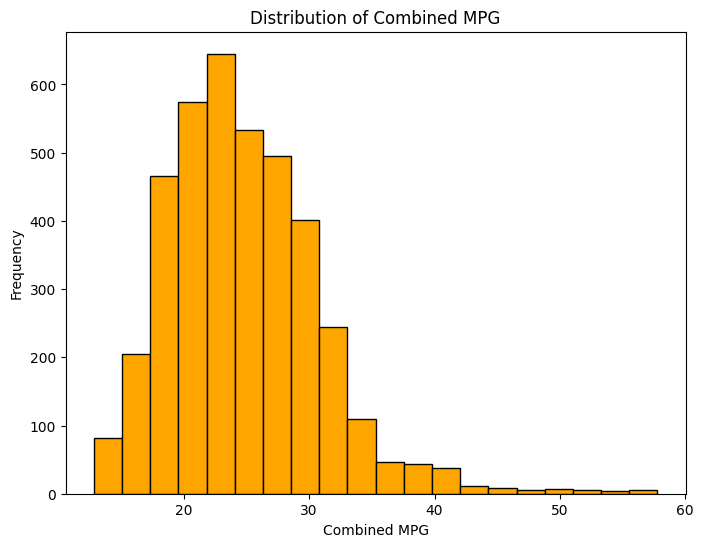

In [35]:
# Histogram for Combined MPG
plt.figure(figsize=(8, 6))
plt.hist(fuel_df['comb'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Combined MPG')
plt.ylabel('Frequency')
plt.title('Distribution of Combined MPG')
plt.show()

**TO DO: Write Code that will give you the following plot as below:**

1.   create a heat map of the data
2.Interpret the data - What story does the visualization tell?

>

Finally What Columns would you delete Drop if the target is the ghg score? Justify your Answer





---

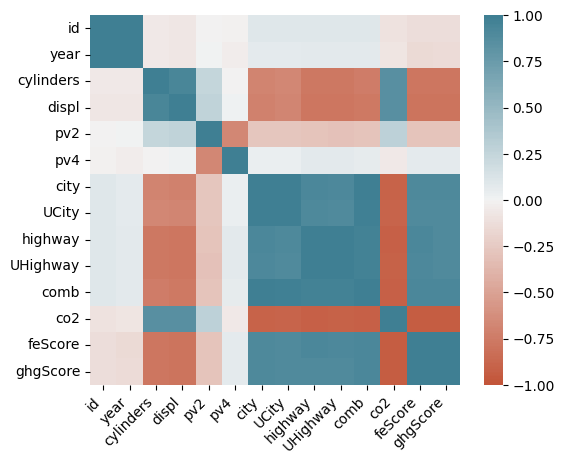

Heat Map of the Data

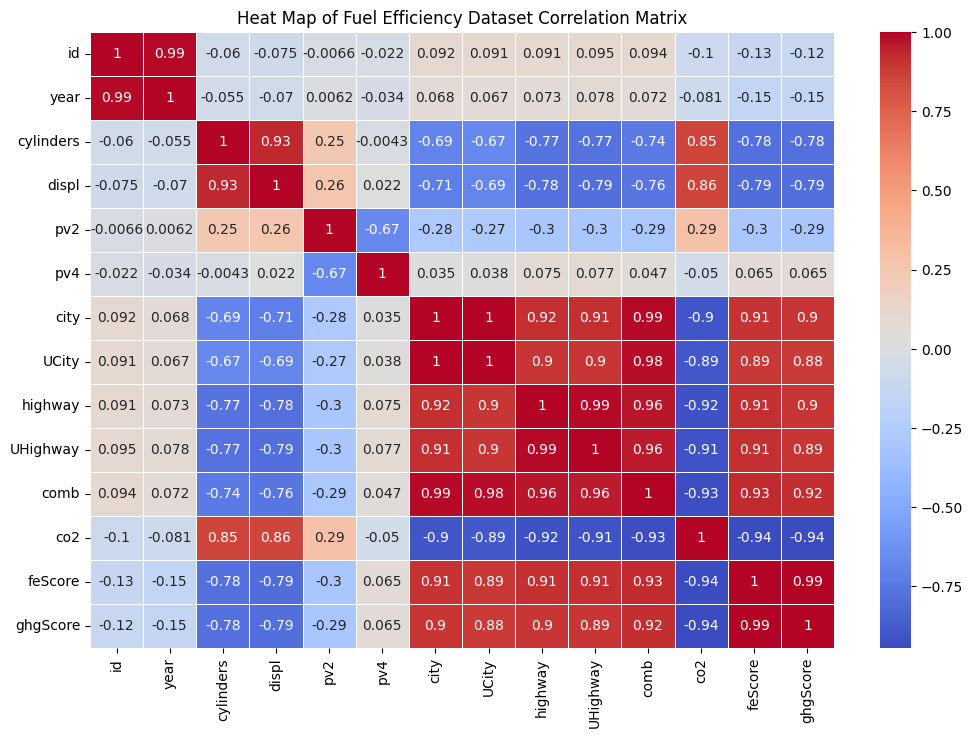

In [32]:
# Select only the numeric columns for the correlation matrix
numeric_fuel_df = fuel_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_fuel_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heat Map of Fuel Efficiency Dataset Correlation Matrix')
plt.show()

The heatmap gives an insight into how different variables in the dataset are related to each other.

If I am trying to predict the greenhouse gas score (ghgScore), I should simplify the data by removing columns that are not useful.